<a href="https://colab.research.google.com/github/danh21/AI_investigation/blob/main/Optimazation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
#load datasheet
print ('Load MNIST Database')
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test) = mnist.load_data()
x_train = np.reshape(x_train,(60000,784))/255.0
x_test = np.reshape(x_test,(10000,784))/255.0
y_train = np.matrix(np.eye(10)[y_train])
y_test = np.matrix(np.eye(10)[y_test])
print("------------------------------------------")
print(x_train.shape)
print(y_train.shape)

Load MNIST Database
------------------------------------------
(60000, 784)
(60000, 10)


In [ ]:
def sigmoid(x):
  return 1./(1.+np.exp(-x))

In [ ]:
def softmax(x):
  return np.divide(np.matrix(np.exp(x)),np.mat(np.sum(np.exp(x),axis=1)))

In [ ]:
def Forwardpass(X,Wh,bh,Wo,bo):
  zh = X@Wh.T + bh
  a = sigmoid(zh)
  z = a@Wo.T + bo
  o = softmax(z)
  return o

In [ ]:
def AccTest(label,prediction): #calculate the matching score
  OutMaxArg = np.argmax(prediction,axis=1)
  LabelMaxArg = np.argmax(label,axis=1)
  Accuracy = np.mean(OutMaxArg==LabelMaxArg)
  return Accuracy

In [ ]:
#define the network parameter
learningRate = 0.5
Epoch = 50
NumTrainSamples = 60000
NumTestSamples = 10000
NumInputs = 784
NumHiddenUnits = 512
NumClasses = 10

#initial weights
#hidden layer
Wh = np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh = np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh = np.zeros((NumHiddenUnits,NumInputs))
dbh = np.zeros((1,NumHiddenUnits))
#Output layer
Wo = np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo = np.random.uniform(0,0.5,(1,NumClasses))
dWo = np.zeros((NumClasses,NumHiddenUnits))
dbo = np.zeros((1,NumClasses))

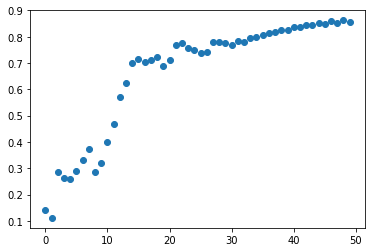

In [ ]:
#Mạng 2 lớp (trực tiếp)
from IPython.display import clear_output
import matplotlib.pyplot as plt
loss = []
Acc = []
for ep in range (Epoch):
  #feed fordware propagation
  x = x_train
  y = y_train
  zh = x@Wh.T + bh
  a = sigmoid(zh)
  z = a@Wo.T + bo
  o = softmax(z)
  #calculate loss
  loss.append(-np.sum(np.multiply(y,np.log10(o))))
  #calculate the error for the output layer
  d = o - y
  #back propagate error
  dh = d@Wo
  dhs = np.multiply(np.multiply(dh,a),(1-a))
  #update weight
  dWo = np.matmul(np.transpose(d),a)
  dbo = np.mean(d) #consider a is 1 for bias
  dWh = np.matmul(np.transpose(dhs),x)
  dbh = np.mean(dhs) #consider a is 1 for bias
  Wo = Wo - learningRate * dWo/NumTrainSamples # + 0.95*Wo
  bo = bo - learningRate * dbo
  Wh = Wh - learningRate * dWh/NumTrainSamples # + 0.95*Wh
  bh = bh - learningRate * dbh
  #Test accuracy with random initial weights
  prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
  plt.show()

In [ ]:
#Test accuracy with random initial weights
prediction = Forwardpass(x_train,Wh,bh,Wo,bo)
Acc = AccTest(y_train,prediction)
print(Acc)

0.8506166666666667


In [ ]:
#define the network parameter
learningRate = 0.5
Epoch = 50
NumTrainSamples = 60000
NumTestSamples = 10000
NumInputs = 784
NumHiddenUnits = 512
NumClasses = 10

#initial weights
#hidden layer
Wh = np.matrix(np.random.uniform(-0.5,0.5,(NumHiddenUnits,NumInputs)))
bh = np.random.uniform(0,0.5,(1,NumHiddenUnits))
dWh = np.zeros((NumHiddenUnits,NumInputs))
dbh = np.zeros((1,NumHiddenUnits))
#Output layer
Wo = np.random.uniform(-0.5,0.5,(NumClasses,NumHiddenUnits))
bo = np.random.uniform(0,0.5,(1,NumClasses))
dWo = np.zeros((NumClasses,NumHiddenUnits))
dbo = np.zeros((1,NumClasses))

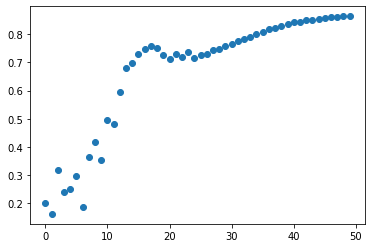

In [ ]:
#Mạng 2 lớp (Momentum)
from IPython.display import clear_output
import matplotlib.pyplot as plt
loss = []
Acc = []
for ep in range (Epoch):
  #feed fordware propagation
  x = x_train
  y = y_train
  zh = x@Wh.T + bh
  a = sigmoid(zh)
  z = a@Wo.T + bo
  o = softmax(z)

  Wo_prev = 0
  Wh_prev = 0

  #calculate loss
  loss.append(-np.sum(np.multiply(y,np.log10(o))))
  #calculate the error for the output layer
  d = o - y
  #back propagate error
  dh = d@Wo
  dhs = np.multiply(np.multiply(dh,a),(1-a))
  #update weight
  dWo = np.matmul(np.transpose(d),a)
  dbo = np.mean(d) #consider a is 1 for bias
  dWh = np.matmul(np.transpose(dhs),x)
  dbh = np.mean(dhs) #consider a is 1 for bias

  Wo = Wo - learningRate * dWo/NumTrainSamples + 0.95 * Wo_prev
  bo = bo - learningRate * dbo
  Wh = Wh - learningRate * dWh/NumTrainSamples + 0.95 * Wh_prev
  bh = bh - learningRate * dbh

  Wo_prev = Wo
  Wh_prev = Wh

  #Test accuracy with random initial weights
  prediction = Forwardpass(x_test,Wh,bh,Wo,bo)
  Acc.append(AccTest(y_test,prediction))
  clear_output(wait=True)
  plt.plot([i for i, _ in enumerate(Acc)],Acc,'o')
  plt.show()

In [ ]:
#Test accuracy with random initial weights
prediction = Forwardpass(x_train,Wh,bh,Wo,bo)
Acc = AccTest(y_train,prediction)
print(Acc)

0.8575166666666667


In [ ]:
'''
NHẬN XÉT:
  - Huấn luyện mạng theo kiểu momentum thì thời gian đến độ ổn định ngắn hơn, ít bước hơn so với huấn luyện kiểu trực tiếp.
  - Trong khoảng thời gian đầu khi chưa đạt được sự ổn định, trọng số cập nhật của trường hợp huấn luyện trực tiếp biến động hơn so với trường hợp huấn luyện kiểu momentum.
'''